# ***✅ Part 1: Preparation***



**import libraries**

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer

# Regression data

In [148]:
data = pd.read_csv('data_final_with_outlier.csv')
print("data shape :",data.shape)
# Show the first few rows to understand the structure
data.head()

data shape : (1994, 43)


,racepctblack,racePctWhite,racePctAsian,pctUrban,pctWFarmSelf,pctWInvInc,pctWPubAsst,pctWRetire,blackPerCap,indianPerCap,...,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.02,0.90,0.12,1.0,0.34,0.60,0.15,0.43,0.32,0.27,...,0.0,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.12,0.74,0.45,1.0,0.11,0.45,0.29,0.39,0.33,0.16,...,0.0,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.49,0.56,0.17,0.0,0.19,0.39,0.40,0.84,0.27,0.07,...,0.0,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,1.00,0.08,0.12,1.0,0.21,0.43,0.20,0.82,0.39,0.16,...,0.0,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.02,0.95,0.09,0.9,0.16,0.68,0.11,0.71,0.28,0.00,...,0.0,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [149]:
X = data.drop(columns=['ViolentCrimesPerPop'])
y = data['ViolentCrimesPerPop']  # The target variable
X_encoded = pd.get_dummies(X)

In [150]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1595, 42) (399, 42) (1595,) (399,)


In [151]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [152]:
print(f"Training shape: {X_train_scaled.shape}, Validation shape: {X_val_scaled.shape}")

Training shape: (1595, 42), Validation shape: (399, 42)


# 🔷 KNN for Regression

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Baseline model with k=5
knn_baseline = KNeighborsRegressor(n_neighbors=5)
knn_baseline.fit(X_train_scaled, y_train)

# Evaluate
y_pred = knn_baseline.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Baseline MSE: {mse:.4f}, R2: {r2:.4f}")

Baseline MSE: 0.0207, R2: 0.5684


In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)  # Keep 98% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [155]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid (now optimized for PCA-reduced data)
param_grid = {
    'n_neighbors': range(5, 30, 5),  # Test k=5,10,15,20,25
    'weights': ['uniform'],  # Start with uniform to prevent overfitting
    'p': [1, 2]  # Manhattan vs Euclidean
}

# Grid search with PCA-transformed data
knn_pca = KNeighborsRegressor()
grid_search = GridSearchCV(knn_pca, param_grid, cv=5,
                         scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

best_knn_pca = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

Best params: {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [156]:
# Training metrics
train_pred = best_knn_pca.predict(X_train_pca)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Validation metrics
val_pred = best_knn_pca.predict(X_val_pca)
val_mse = mean_squared_error(y_val, val_pred)
val_r2 = r2_score(y_val, val_pred)

print(f"\nPCA + KNN Performance:")
print(f"Training MSE: {train_mse:.4f} | R²: {train_r2:.4f}")
print(f"Validation MSE: {val_mse:.4f} | R²: {val_r2:.4f}")


PCA + KNN Performance:
Training MSE: 0.0177 | R²: 0.6819
Validation MSE: 0.0187 | R²: 0.6101


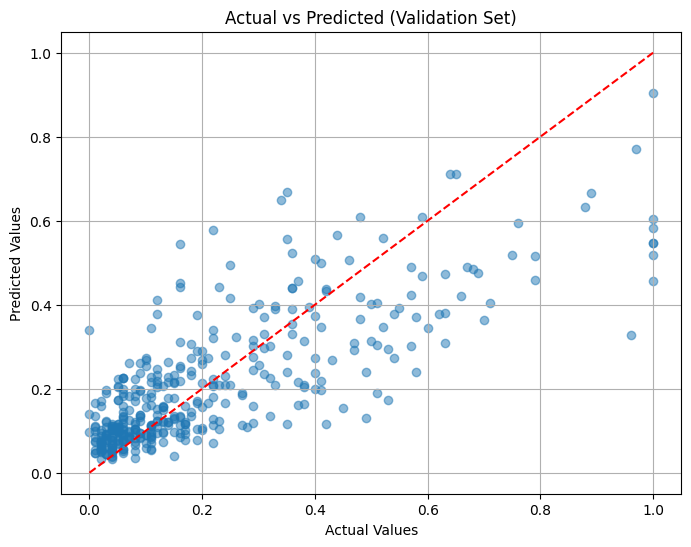

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Validation Set)")
plt.grid(True)
plt.show()


Training Metrics:
R^2: 0.6819
MSE: 0.0177
MAE: 0.0921
RMSE: 0.1330

Validation Metrics:
R^2: 0.6101
MSE: 0.0187
MAE: 0.0971
RMSE: 0.1367


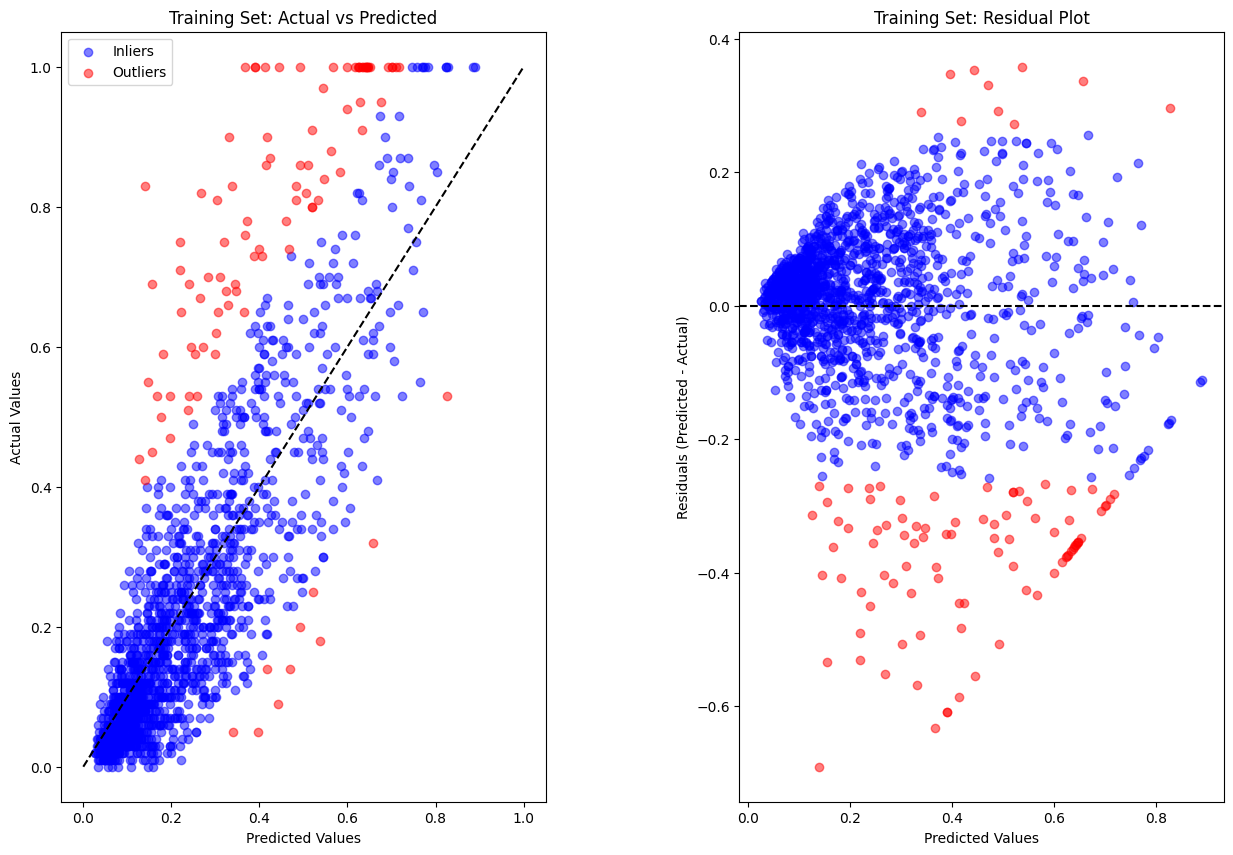

In [158]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred_train = train_pred  # Or use pipe.predict(X_train_scaled) if using pipeline
y_pred_val =val_pred

# Calculate metrics (training set)
print('Training Metrics:')
print('R^2: %.4f' % r2_score(y2_train, y_pred_train))
print('MSE: %.4f' % mean_squared_error(y2_train, y_pred_train))
print('MAE: %.4f' % mean_absolute_error(y2_train, y_pred_train))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y2_train, y_pred_train)))

# Validation metrics
print('\nValidation Metrics:')
print('R^2: %.4f' % r2_score(y2_val, y_pred_val))
print('MSE: %.4f' % mean_squared_error(y2_val, y_pred_val))
print('MAE: %.4f' % mean_absolute_error(y2_val, y_pred_val))
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y2_val, y_pred_val)))

# Create outlier mask (since KNN doesn't have inlier_mask, we'll identify outliers manually)
residuals = y_pred_train - y2_train
std_res = np.std(residuals)
outlier_mask = np.abs(residuals) > 2*std_res  # 2 standard deviations as threshold

# Create the plots
plt.figure(figsize=(15, 10))

# Left plot: Actual vs Predicted
ax1 = plt.subplot(121)
ax1.scatter(y_pred_train[~outlier_mask], y2_train[~outlier_mask], c='blue', alpha=0.5, label='Inliers')
ax1.scatter(y_pred_train[outlier_mask], y2_train[outlier_mask], c='red', alpha=0.5, label='Outliers')
ax1.plot([y2_train.min(), y2_train.max()],
         [y2_train.min(), y2_train.max()],
         c='black', linestyle='dashed')
ax1.set_title('Training Set: Actual vs Predicted')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.legend()

# Right plot: Residuals
ax2 = plt.subplot(122)
ax2.scatter(y_pred_train[~outlier_mask],
            residuals[~outlier_mask],
            c='blue', alpha=0.5)
ax2.scatter(y_pred_train[outlier_mask],
            residuals[outlier_mask],
            c='red', alpha=0.5)
ax2.axhline(y=0, c='black', linestyle='dashed')
ax2.set_title('Training Set: Residual Plot')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals (Predicted - Actual)')

plt.subplots_adjust(wspace=0.4)
plt.show()